This assignment can be completed by adding code to this notebook for each question.

Turn in a completed script, renamed as

`assignment7_lastname.ipynb`

via JupyterHub and Canvas. 

**DUE DATE: 3 December 2025 at 11:00 a.m.**

Prior to turning in your script, please cleanup and comment your code for each problem. Be sure that your output is self-describing.

### Total Points: <span style="color:red">50</span> 

In [ ]:
# add all imports needed to this cell
from datetime import datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.interpolate import interpolate_to_grid
from metpy.io import add_station_lat_lon
from metpy.plots import StationPlot
from metpy.units import units
import numpy as np
from siphon.catalog import TDSCatalog
import xarray as xr

### Question #1 Soundings: <span style="color:red">25 pts</span>

**Background**

Soundings and the parameters that can be calculated from them are
essential tools that meteorologists use on a daily basis. While it is
relatively easy to calculate some of these parameters by hand, it is
helpful to have predefined functions that can make easy work of doing
these calculations for any number of soundings. Additionally, it is
useful to automate the plotting of temperature, dewpoint, and wind speed
and direction on a skew-T diagram, so that a high-quality visualization
can be produced quickly and on-demand. 

In [ ]:
# Read in the 12 UTC sounding on June 12, 2004, for Springfield, MO. 'SGf'
date = datetime()
station = 

#Save it in a Panda dataframe
df = WyomingUpperAir.request_data(date, station)

### Part A: <span style="color:red">10 pts</span>  
Calculate the following for a surface-based parcel path:
- Lifting Condensation Level (LCL)
- Level of Free Convection  (LFC)
- Equilibrium Level (EL)
- SBCAPE (surface-based)
- SBCIN  (surface-based)

Use an f-string format to print out all of these values!

> Note: Utilize your resources well. These can all be calculated easily using the MetPy module.
> https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html#module-metpy.calc

## Part B: <span style="color:red">15 pts</span> 
Plot the sounding on a skew-T using Python and include the
surfaced-based parcel profile (15 points) .
- Plot an appropriate title on the skew-T with the station ID, date and time of the launch
- Plot markers and text to identify the locations of the LCL, LFC, and EL.
- Shade the CAPE and CIN area on the plot.
    
> Note: Utilize the temperature and pressure values from finding the levels to help you plot the marker and text in the correct location.
    

### Question #2 Surface Analysis: <span style="color:red">25 pts</span> 
Create a gridded interpolation of MSLP for a given date and time with a five minute timedelta. Plot a region for the eastern CONUS (from Colorado to just off the Atlantic coast) including the contours of MSLP (every 4 hPa) from the gridded interpolation and the MSLP values to the tenths (e.g., 1004.3 hPa).

Data <span style="color:red">(5 pts)</span>:
  * Use ASOS surface observations using given definition to read data using a 5 minute timedelta
  * Use altimeter values (`alti`) and convert to units of `hPa` from `inHg`

Grid Interpolation <span style="color:red">(10 pts)</span>:
  * interpolation type: `'rbf'`
  * horizontal grid spacing: `0.25` degree lat/lon
  * smooth contour field

Plot Grid and Observations <span style="color:red">(10 pts)</span>:
  * Region: west=-110 W; east=-60 W; south=25 N; north=50 N
  * Use a Lambert Conformal Projection with `central_longitude=-100` and `central_latitude=40`
  * Contours of MSLP (every 4 hPa) from gridded interpolation of surface observations
  * Plot values of MSLP in tenths (e.g., 1003.4 hPa)
  * Reduce (thin) the plotted values with radius of 100 km (https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.reduce_point_density.html)
  
Example Image:
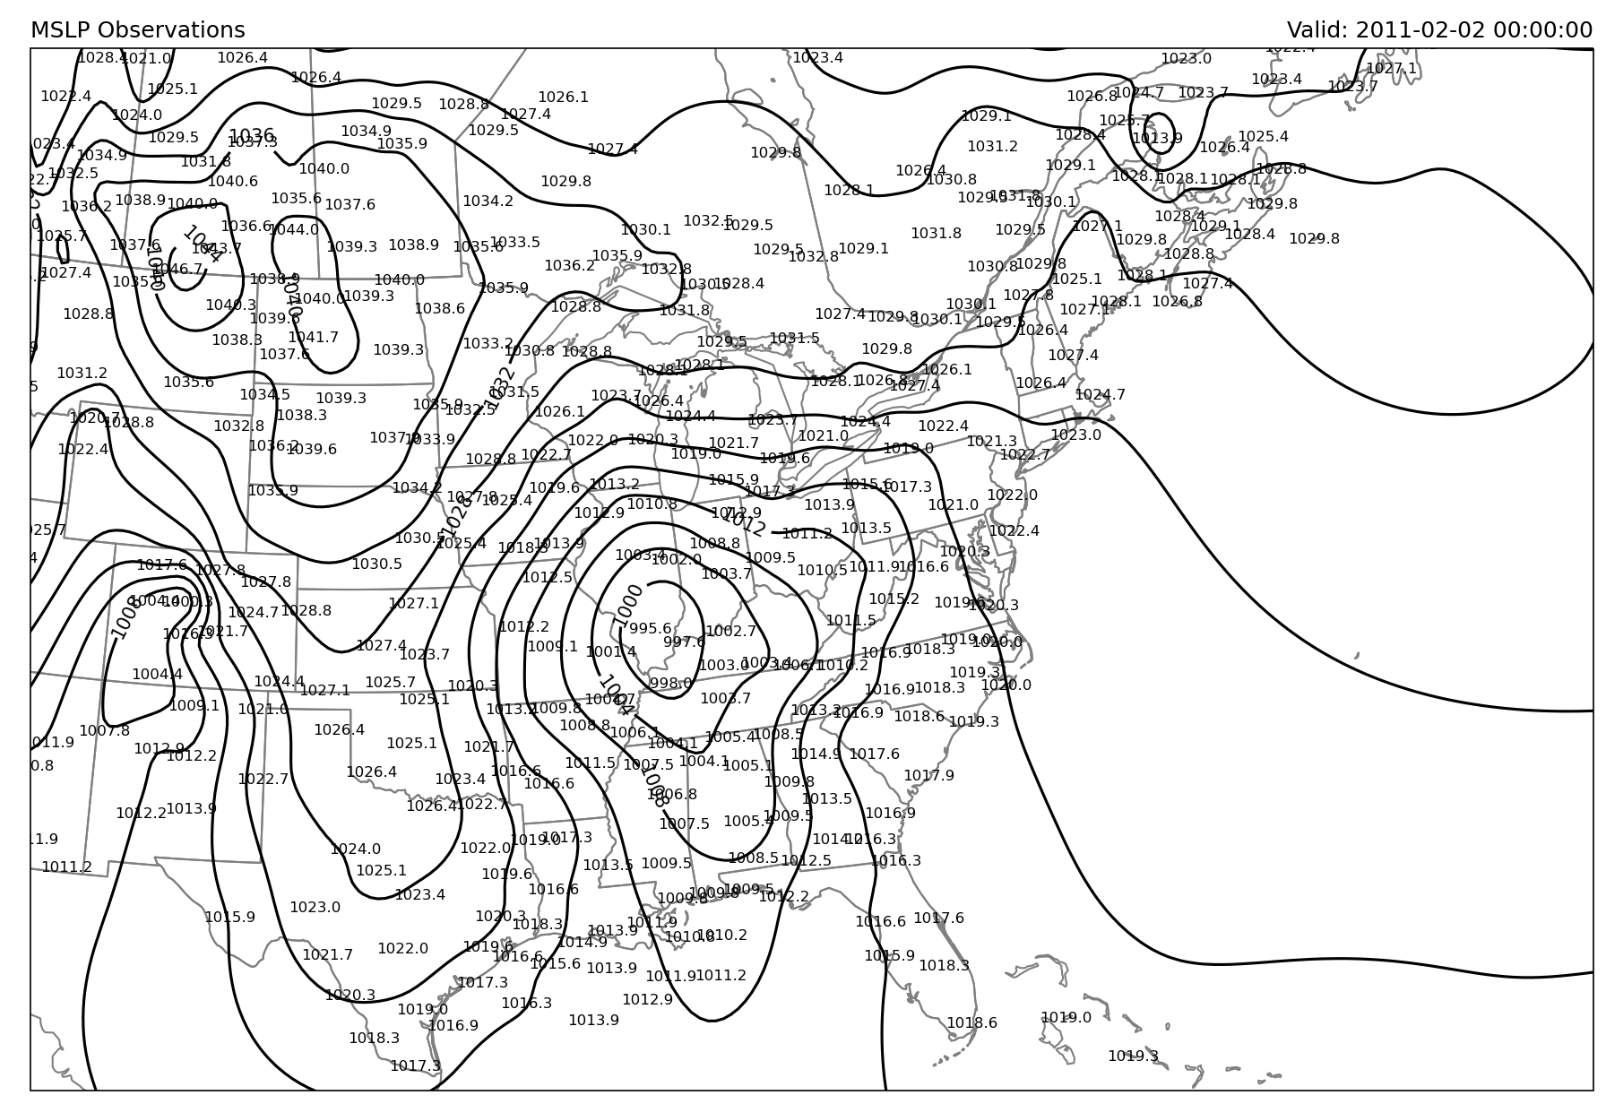

### Once again we will tap into the Iowa State database!

In [ ]:
def read_remote_surface_data(date, dt=timedelta(minutes=20)):
    '''A function to read data from Iowa State ASOS archive.
    
    Input:
      - date: a datetime object
      - dt: a timedelta object indicating the timespan to collect data
    
    Output:
      - returns a Pandas DataFrame of the most recent surface observations from the given date, time, and timedelta range.
    '''
    import pandas as pd
    
    sdate = date - dt
    edate = date + dt

    df = pd.read_csv('http://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?data=all&tz=Etc/UTC&format=comma&latlon=yes&'
                     f'year1={sdate.year}&month1={sdate.month}&day1={sdate.day}&hour1={sdate.hour}&minute1={sdate.minute}&'
                     f'year2={edate.year}&month2={edate.month}&day2={edate.day}&hour2={edate.hour}&minute2={edate.minute}',
                     skiprows=5, na_values=['M']).replace('T', 0.00001)
    return df.groupby('station').tail(1)

In [ ]:
# Add code below